<h1>A little bit of info about this dataset (From README file)</h1>
<p>Average consumer prices are calculated for household
fuel, motor fuel, and food items from prices collected for the Consumer
Price Index (CPI). Average prices are best used to measure the price level
in a particular month, not to measure price change over time. It is more
appropriate to use CPI index values for the particular item categories to measure
price change.</p>

<p>This data was downloaded from <a href='https://data.bls.gov/cgi-bin/surveymost?bls'>https://data.bls.gov/cgi-bin/surveymost?bls</a></p>
<p>This is a government website that tracks CPI</p>

<h1>Cleaning the Data</h1>

<ol>
    <li>I imporrted all of the needed visulization modules</li>
    <li>I merged all 5 of the DataFrames on appropriate columns</li>
    <li>I renamed and used .strip on the series_id and value column so I could easily index them</li>
    <li>I dropped redundant and useless columns that would not add enough depth to my analysis</li>
    <li>I removed rows that contained a hypen (NAN) for value</li>
    <li>I changed the year data type to float</li>
    <li>I removed parentheses from item name to stop a regex error when using .contains</li>
    <li>Finally, I printed the cleaned Data Frame</li>
</ol>

In [35]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
import plotly.express as px
cf.go_offline()
import plotly.io as pio
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Areas = pd.read_csv('Areas.csv', sep='\t')
Current = pd.read_csv('Current_Data.csv', sep='\t')
Items = pd.read_csv('Items.csv', sep='\t')
Periods = pd.read_csv('Period_Names.csv', sep='\t')
Series = pd.read_csv('Series.csv', sep='\t')

# I cleaned the data and made the appropriate merges (there is WHITESPACE ** Make Sure To Clean Whitespace) **

complete_df = pd.merge(Series, Areas, on='area_code').merge(Current, on='series_id        ').merge(Items, on='item_code').merge(Periods, on='period')
complete_df = complete_df.rename(columns = {'series_id        ': 'series_id', '       value': 'value'})
complete_df['series_id'] = complete_df['series_id'].str.strip()
complete_df['value'] = complete_df['value'].str.strip()

# Dropping the appropriate columns

complete_df.drop(['period_name', 'footnote_codes_x', 'footnote_codes_y', 'series_title', 'series_id', 'area_code', 'period', 'begin_year', 'begin_period', 'end_year', 'end_period'], axis=1, inplace=True)

# Dropping certain 'value' rows containing the hyphen (-) as filler

condition = complete_df[complete_df['value'] == '-'].index
complete_df.drop(condition, axis=0, inplace=True)

# Changing Certain Data Types from Strings to Float, Int, or DateTime

complete_df['value'] = complete_df['value'].astype(float)

# Changing Parentheses to another character due to regex

complete_df['item_name'] = complete_df['item_name'].str.replace('(', '').str.replace(')', '')

# Showing the cleaned DataFrame

complete_df

,item_code,area_name,year,value,item_name,period_abbr
0,701111,U.S. city average,1995,0.238,"Flour, white, all purpose, per lb. 453.6 gm",JAN
1,701111,U.S. city average,1996,0.262,"Flour, white, all purpose, per lb. 453.6 gm",JAN
2,701111,U.S. city average,1997,0.309,"Flour, white, all purpose, per lb. 453.6 gm",JAN
3,701111,U.S. city average,1998,0.299,"Flour, white, all purpose, per lb. 453.6 gm",JAN
4,701111,U.S. city average,1999,0.297,"Flour, white, all purpose, per lb. 453.6 gm",JAN
...,...,...,...,...,...,...
191080,FS1101,U.S. city average,2020,3.533,"Butter, stick, per lb. 453.6 gm",DEC
191081,FS1101,U.S. city average,2021,3.474,"Butter, stick, per lb. 453.6 gm",DEC
191082,FS1101,West,2021,3.772,"Butter, stick, per lb. 453.6 gm",DEC
191083,703611,Northeast,1995,3.315,"Steak, sirloin, USDA Choice, bone-in, per lb. ...",DEC


<h1>
    EDA (Exploratory Data Analysis)
</h1>

<ol>
    <h2>Top 10 Expensive Items</h2>
    <li>I created a table of the top 10 most expensive items and their average costs</li>
    <li>Then, based on this list of items, I created plotly interactive graphs of their changes in price from 1995-2022</li>
    <h2>Top 10 Most Volatile Items</h2>
    <li>I found the top 10 most volatile items, and their STD's</li>
    <li>Then, based on this list, I used plotly to show their price change from 1995-2022</li>
    <h2>Top 10 Most Volatile Areas</h2>
    <li>I created a table of the top 10 most price changing areas</li>
    <li>Then, I created a bar chart to show their STD's in relation to one-another</li>
</ol>

Plotting the Top 10 most expensive items over 1995-2022

                                           item_name      value
0                     Utility piped gas - 100 therms  97.894133
1                            Electricity per 500 KWH  56.998854
2                      Utility piped gas - 40 therms  44.486238
3  Coffee, instant, plain, regular, all sizes, pe...  10.314809
4  Vodka, all types, all sizes, any origin, per 1...  10.243507
5  Wine, red and white table, all sizes, any orig...   9.190629
6  Steak, sirloin, USDA Choice, boneless, per lb....   6.599051
7  Steak, rib eye, USDA Choice, boneless, per lb....   6.343247
8  Steak, T-Bone, USDA Choice, bone-in, per lb. 4...   6.129419
9         All Uncooked Beef Steaks, per lb. 453.6 gm   6.100857


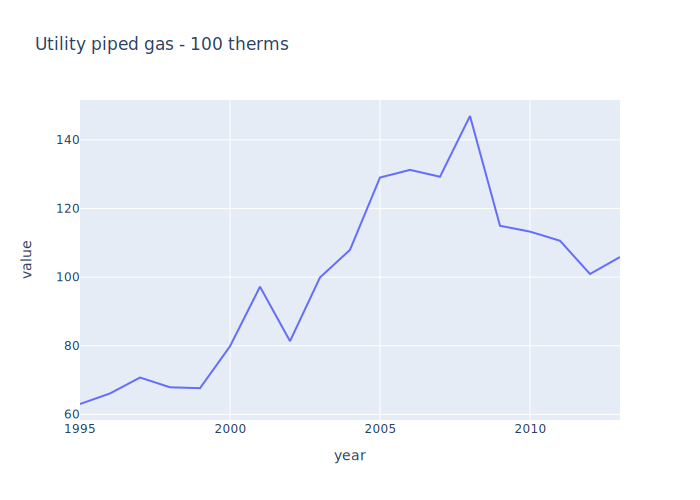

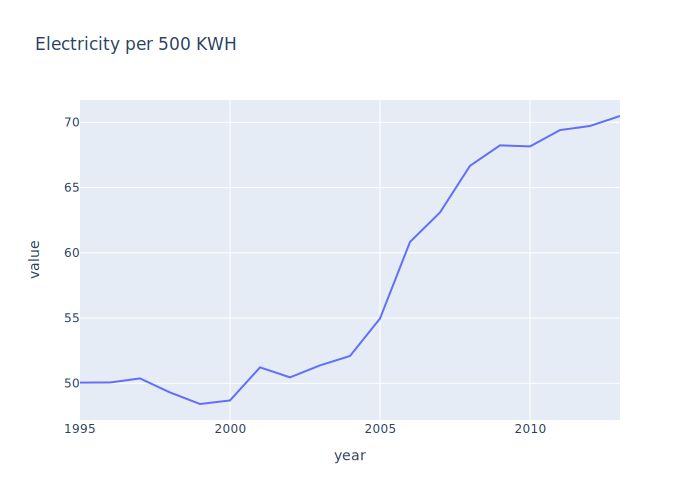

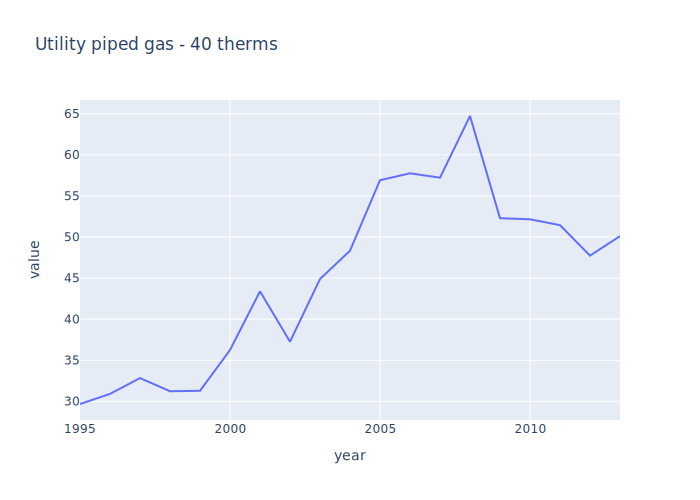

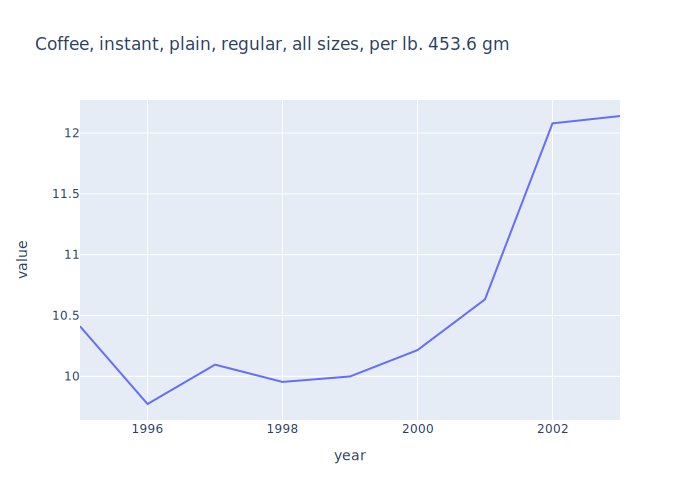

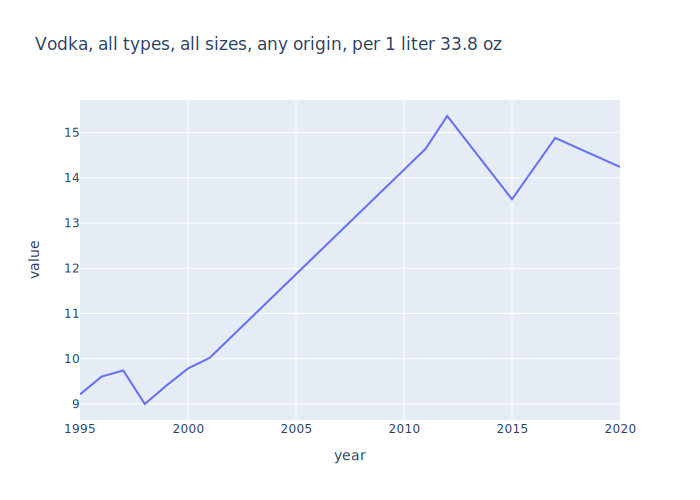

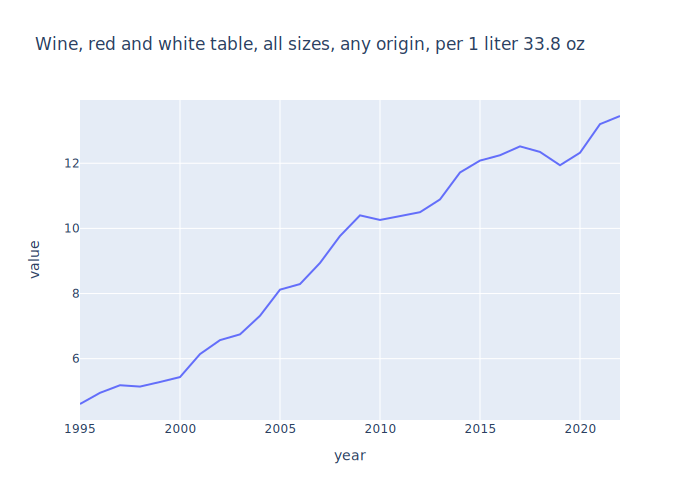

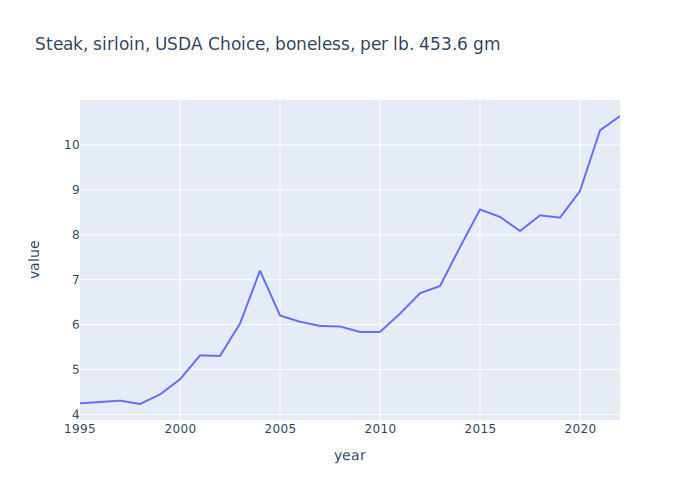

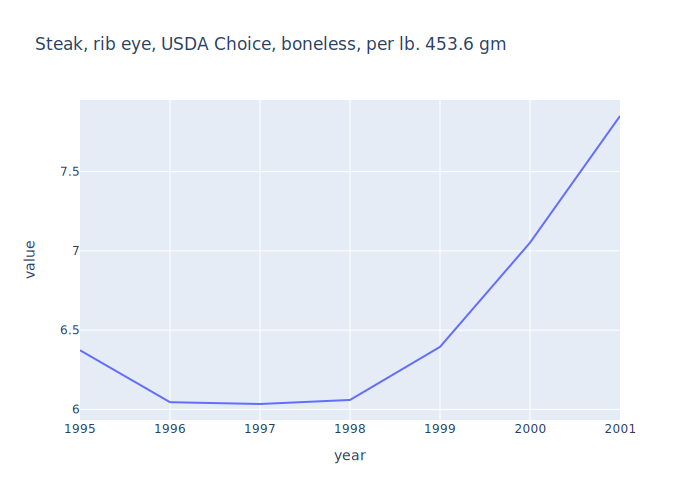

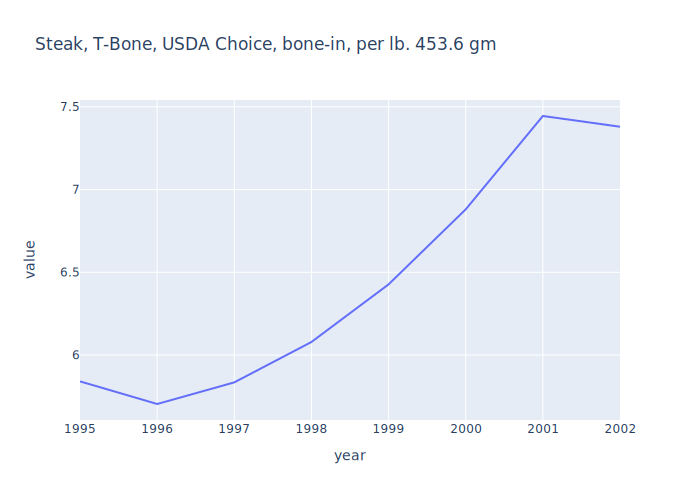

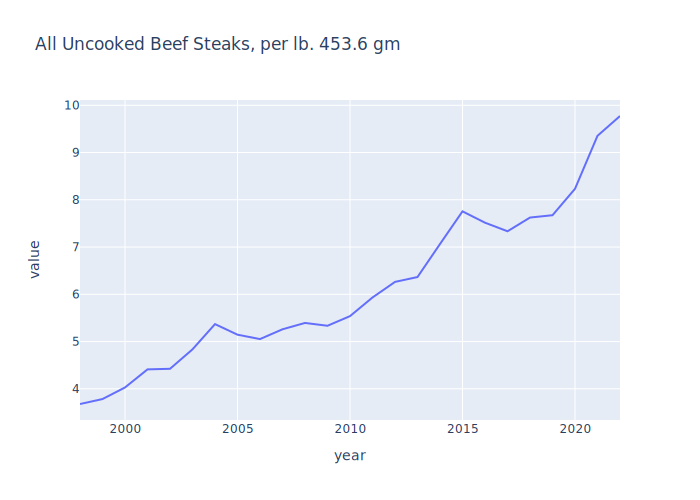

In [36]:
# Looking at top 10 most expensive items

topTenExpensive = pd.DataFrame((complete_df.groupby(['item_name']).value.mean()).sort_values(ascending=False).reset_index().head(10))
byItem = pd.DataFrame((complete_df.groupby(['year', 'item_name']).value.mean()).reset_index())

print('Plotting the Top 10 most expensive items over 1995-2022')
print('')
print(topTenExpensive)

def top10Expensive():
    for name in topTenExpensive['item_name']:
        fig = px.line(byItem[byItem['item_name'] == name], x='year', y='value', title=name)
        fig.show(renderer="svg")

top10Expensive()

Plotting the Top 10 most volatile items over 1995-2022

                                           item_name        STD
0                     Utility piped gas - 100 therms  30.796561
1                      Utility piped gas - 40 therms  13.462034
2                            Electricity per 500 KWH  13.389332
3  Wine, red and white table, all sizes, any orig...   3.213170
4  Vodka, all types, all sizes, any origin, per 1...   1.967436
5  Steak, sirloin, USDA Choice, boneless, per lb....   1.898611
6         All Uncooked Beef Steaks, per lb. 453.6 gm   1.665545
7                    Bacon, sliced, per lb. 453.6 gm   1.415447
8  Ground beef, lean and extra lean, per lb. 453....   1.379521
9  Steak, round, USDA Choice, boneless, per lb. 4...   1.290679


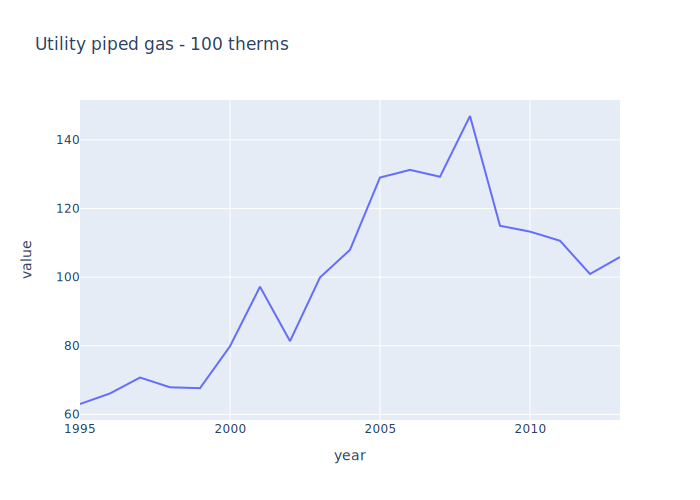

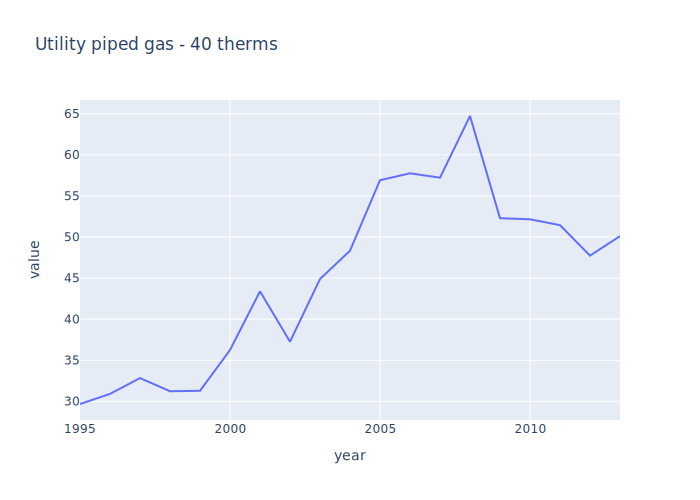

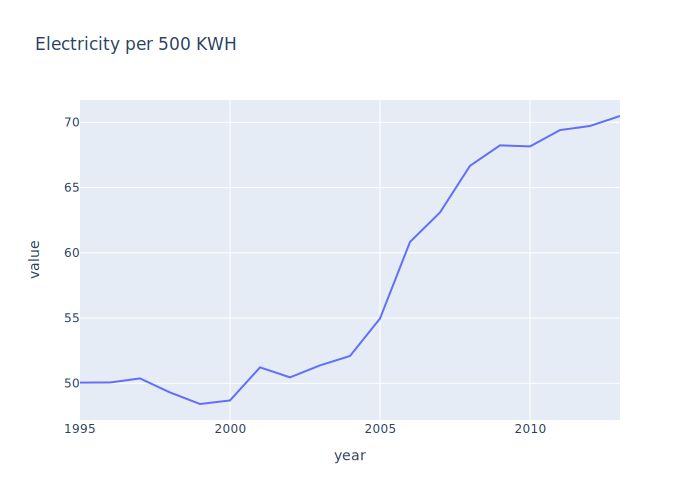

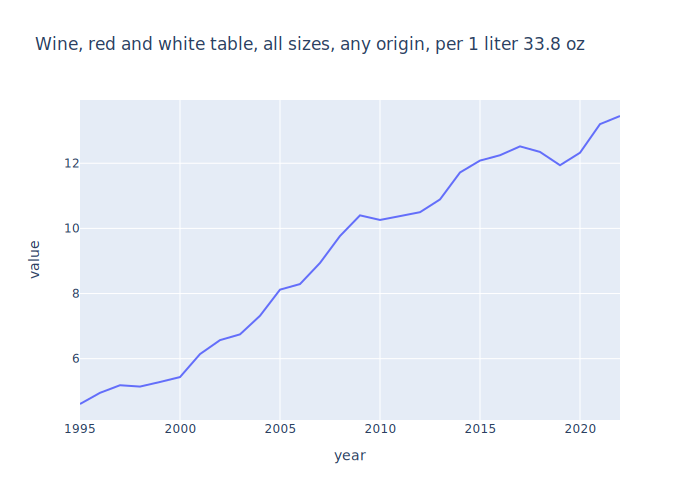

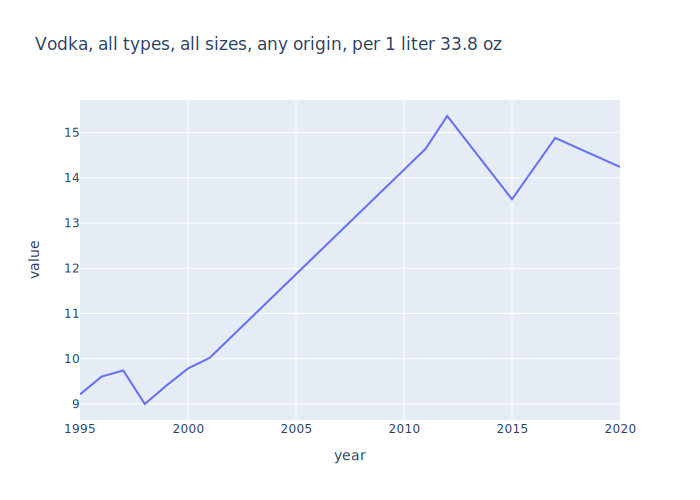

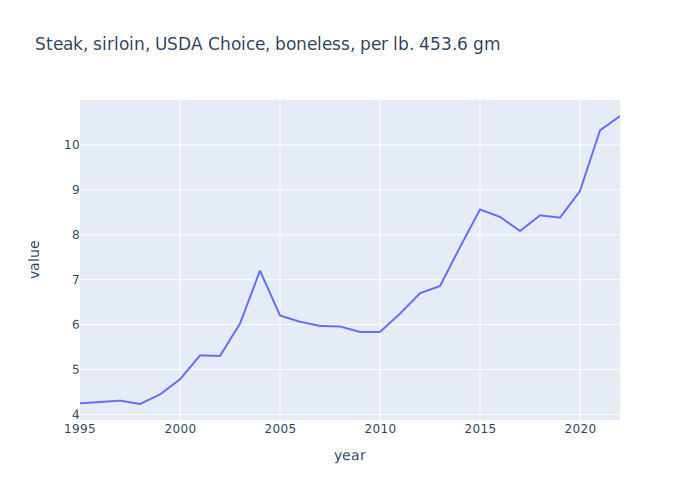

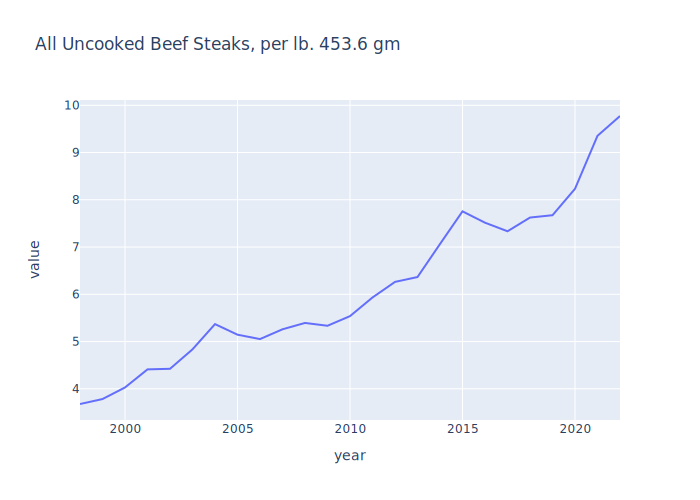

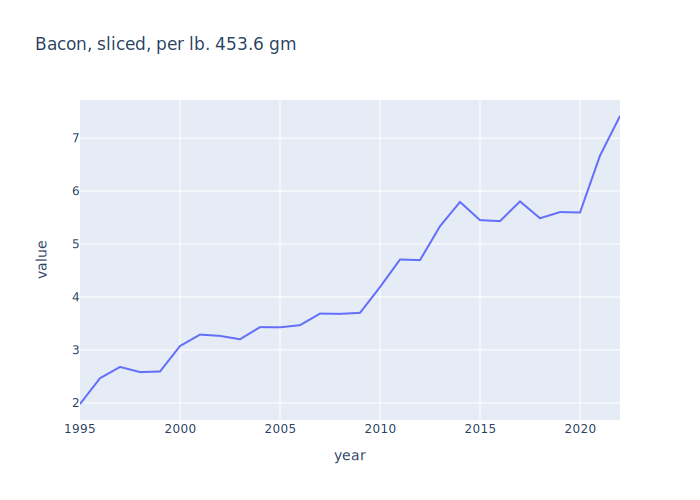

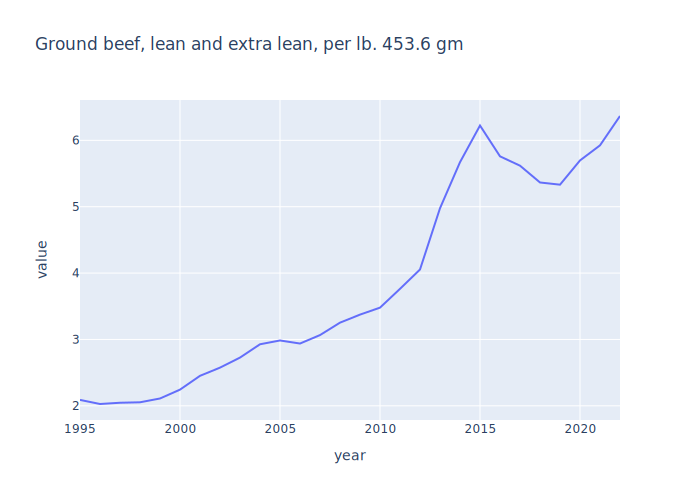

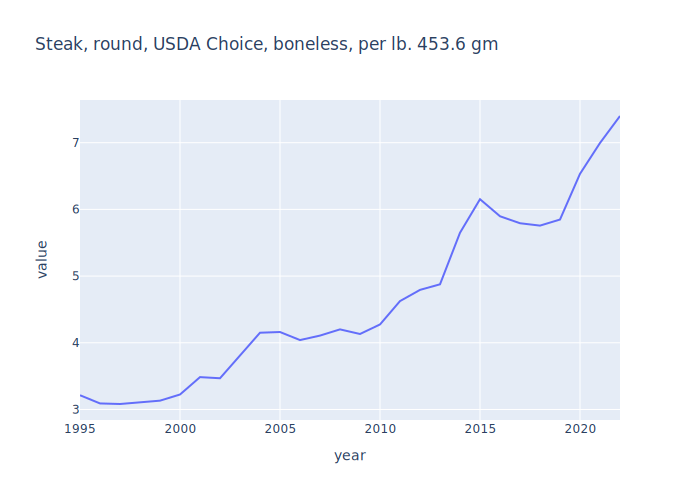

In [37]:
# Items Ranked by STD (Most Volatile)

STD = pd.DataFrame(complete_df.groupby(['item_name']).value.std()).sort_values(by='value', ascending=False).reset_index().head(10)
byItem = pd.DataFrame((complete_df.groupby(['year', 'item_name']).value.mean()).reset_index())

print('Plotting the Top 10 most volatile items over 1995-2022')
print('')

STD.rename(columns = {'value': 'STD'}, inplace=True)
print(STD)

def top10STD():
    for name in STD['item_name']:
        fig = px.line(byItem[byItem['item_name'] == name], x='year', y='value', title=name)
        fig.show(renderer="svg")
        
top10STD()

Below are the top 10 most volatile (price changing) areas

                                     area_name        STD
0    Miami-Fort Lauderdale-West Palm Beach, FL  40.891485
1        New York-Newark-Jersey City, NY-NJ-PA  39.869070
2            Atlanta-Sandy Springs-Roswell, GA  39.303667
3            Washington-Baltimore, DC-MD-VA-WV  38.159083
4               Boston-Cambridge-Newton, MA-NH  37.768607
5  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  37.403162
6                     Northeast - Size Class A  35.317134
7            San Francisco-Oakland-Hayward, CA  33.733888
8      Los Angeles-Riverside-Orange County, CA  33.500078
9                   Northeast - Size Class B/C  32.915176


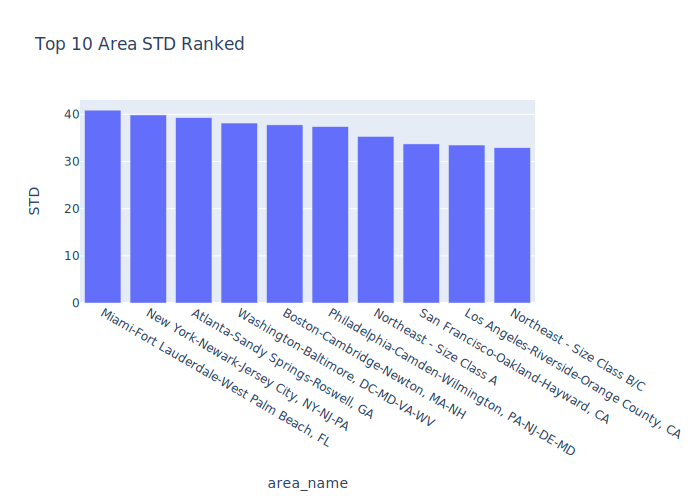

In [38]:
# Top 10 Most Price Changing Areas

Top10Areas = pd.DataFrame(complete_df.groupby(['area_name']).value.std()).sort_values(by='value', ascending=False).reset_index().head(10)
Top10Areas.rename(columns = {'value': 'STD'}, inplace=True)

print('Below are the top 10 most volatile (price changing) areas')
print('')
print(Top10Areas)

def top10Areas():
    fig = px.bar(Top10Areas, x='area_name', y='STD', title='Top 10 Area STD Ranked')
    fig.show(renderer="svg")

top10Areas()

<h1>User Tools</h1>

<p>NOTE: I have created 3 user tools in order for viewers of this code to use it for their own EDA</p>
<p>NOTE: The user input may not be very visible, so you need to click around the output tab to find it</p>
<p>For the best result, please run any User Tool Functions in the VERY LAST CELL, which is marked for user analysis</p>

<ol>
<h2>getCategoryByCode</h2>
<li>This function takes in a specific item code (see the DataFrame column item_code) to filter out the price change of a given item</li>
<li>This function is very specific... Unless you know the EXACT ITEM CODE, do not use it</li>
<h2>getCategoryByName</h2>
<li>This function is like a search engine... If you give it a query, it will narrow down your search options untill you specify exact wording... Do this by copy and pasting the query from the given list... A query is surrounded by quotations</li>
<h2>Price_Dist</h2>
<li>This function returns the price distribution across all items for a given year in its range</li>
<li>Only accepts years between 1995 and 2022</li>
</ol>

In [39]:
# Function that takes in an item_code, and outputs the change in price of that item over a given interval

def getCategoryByCode(item_code=None):
    item_code = input()
    byItemCode = pd.DataFrame(complete_df.groupby(['year', 'item_code', 'item_name']).value.mean()).reset_index()
    if item_code in byItemCode['item_code'].values:
        category = byItemCode[byItemCode['item_code'] == item_code]
        lineplot = px.line(category, x='year', y='value', title=category['item_name'].unique()[0] + " Prices")
        return lineplot
    else:
        print('Sorry, that item code could not be located.')

# Function that takes in item_name as a query, narrows down the search to a finite list, and allows user to go in depth on the item

def getCategoryByName(item_name=None):
    item_name = input().upper()
    byItemName = pd.DataFrame(complete_df.groupby(['year', 'item_name']).value.mean()).reset_index()
    byItemName['item_name'] = byItemName['item_name'].apply(lambda x: x.upper())
    filtered = byItemName[byItemName['item_name'].str.contains(item_name)]
    if filtered['item_name'].nunique() > 1:
        print('Insert a more specific query, as there is more than one result')
        print('Here is a list of the unique values related to your query: ' + str(list(filtered['item_name'].unique())))
    elif filtered['item_name'].nunique() == 0:
        print('This item either does not exist, please input an item that exists.')
    else:
        lineplot = px.line(filtered, x='year', y='value', title=filtered['item_name'].unique()[0] + " Prices")
        return lineplot

In [40]:
# Allows user to enter a year between 1995 and 2022 in order to visualize the price distribution of items for the given year

def Price_Dist(year=None):
    by_year = pd.DataFrame(complete_df.groupby(['year', 'item_name']).value.mean()).reset_index()
    year = int(input())
    if year in by_year['year'].values:
        distribution = by_year[by_year['year'] == year]
        plot = sns.histplot(x='value', data=distribution, kde=True)
        plt.title(str(year) + ' Price Distribution')
        return plot
    else:
        print('This is not a valid year, pick a year between 1995 and 2022')

In [41]:
# This cell is for running User Tool Functions: Below are the commented calls for each function
# Uncomment the function(s) you want to use

#getCategoryByCode()
#getCategoryByName()
#Price_Dist()